/usr/local/anaconda3/lib/python3.9/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


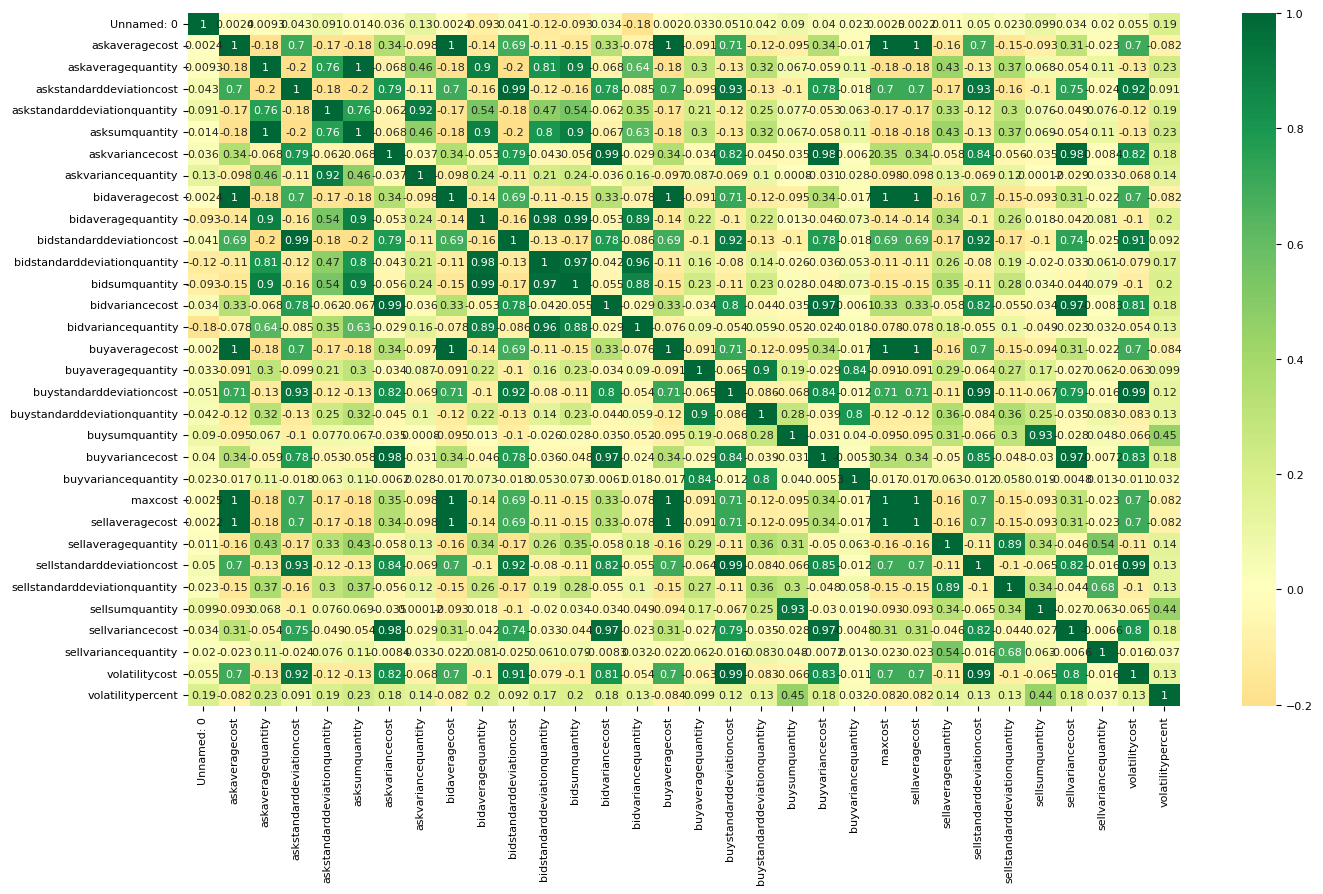

In [1]:
import psycopg2
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import seaborn as sns
import pandas as pd
import matplotlib.dates as mpl_dates
from matplotlib import rcParams
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")

def show_correlation_map(df):
    cor = df.corr()
    plt.figure(figsize=(16,9))
    
    plt.rcParams.update({'font.size': 8})
    
    sns.heatmap(cor, center=0, cmap="RdYlGn", annot = True)
    plt.show()
  
def split_dataframe_by_column(df, split_col, sort_col): 
    hash_map = {}
    for key in df[split_col].unique():
        hash_map[key] = df[df[split_col]==key].drop(split_col, axis=1).sort_values(by=[sort_col], ascending=True).reset_index(drop=True)
    return hash_map


candles = pd.read_csv("candle.csv")

trade_volume_map = split_dataframe_by_column(candles, 'currency', 'closetimestamp')

cl = candles.drop(columns=['id', 'closetimestamp', 'opentimestamp', 'closecost', 'opencost', 'mincost'])

show_correlation_map(cl)

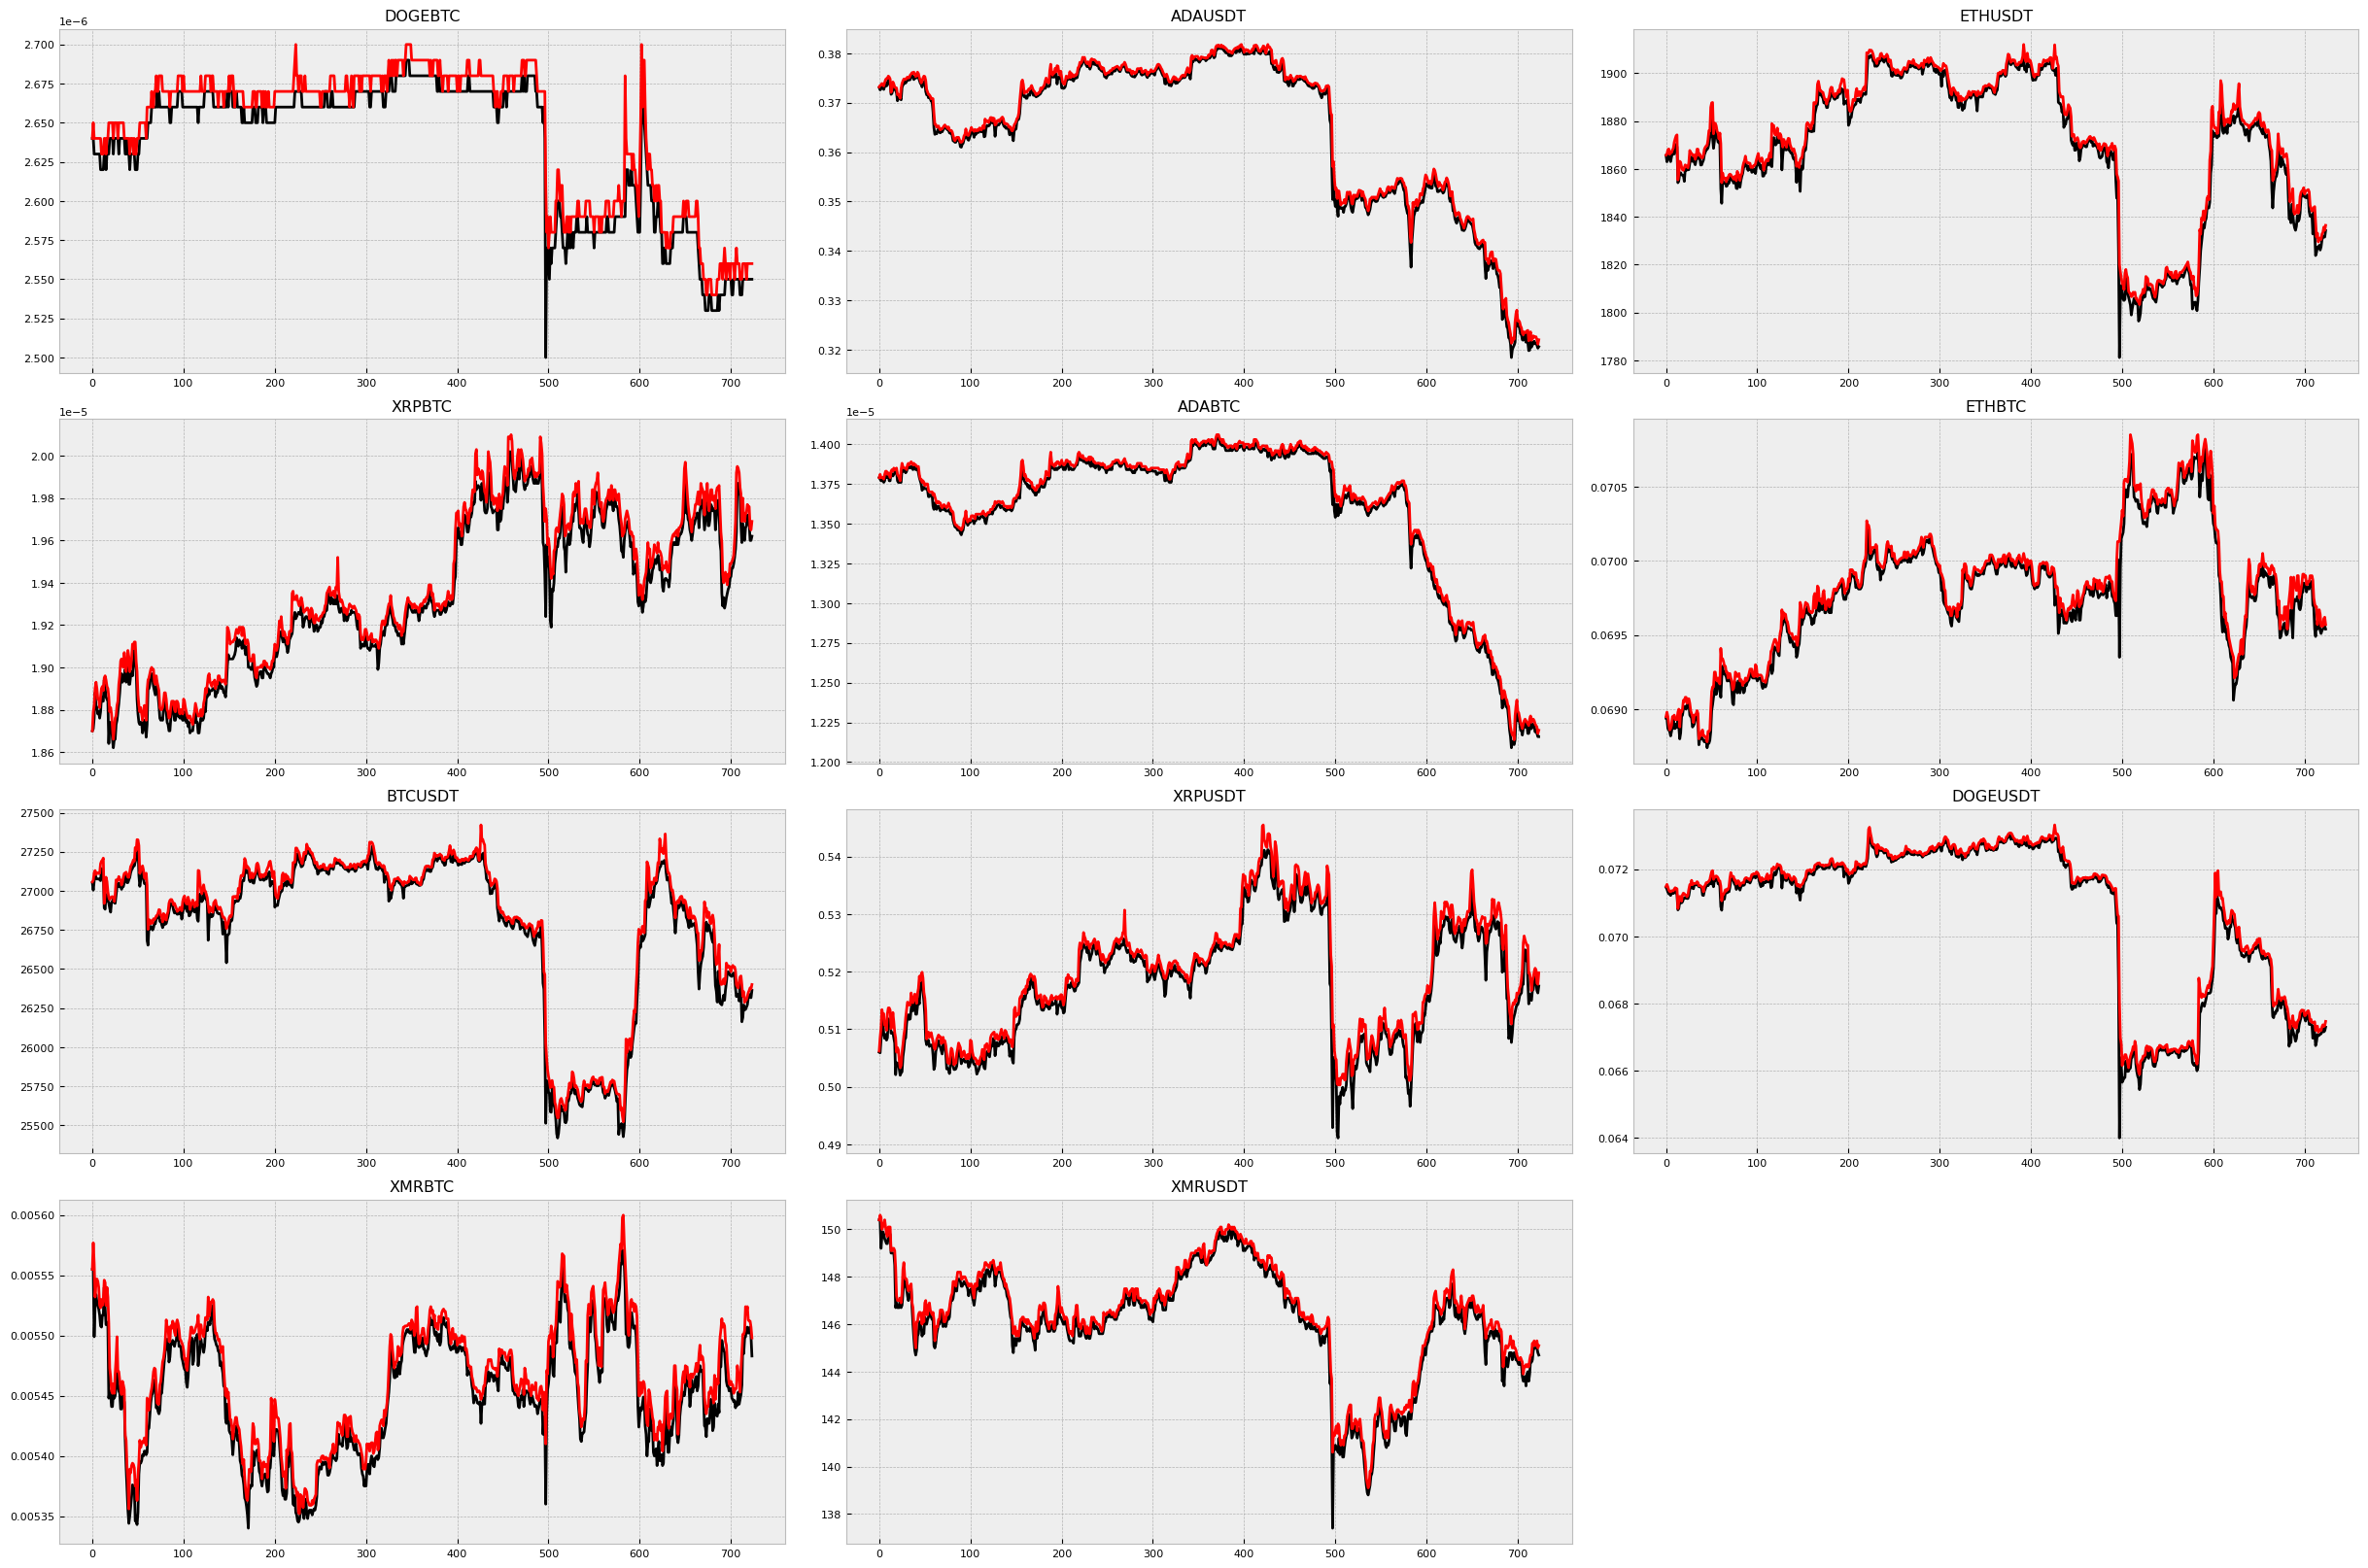

In [2]:
with plt.style.context('bmh'):
    plt.figure(figsize=(32, 20))
    x,y = 1,1
    for i, key in enumerate(trade_volume_map.keys()):
        ts_ax = plt.subplot2grid((5,4), (x, y))
        trade_volume_map[key]['mincost'].plot(ax=ts_ax, color='black')
        trade_volume_map[key]['maxcost'].plot(ax=ts_ax, color='red')
        ts_ax.set_title(key)
        if x==4:
            x=1
            y=y+1
        else:
            x=x+1
    plt.tight_layout()
    
    


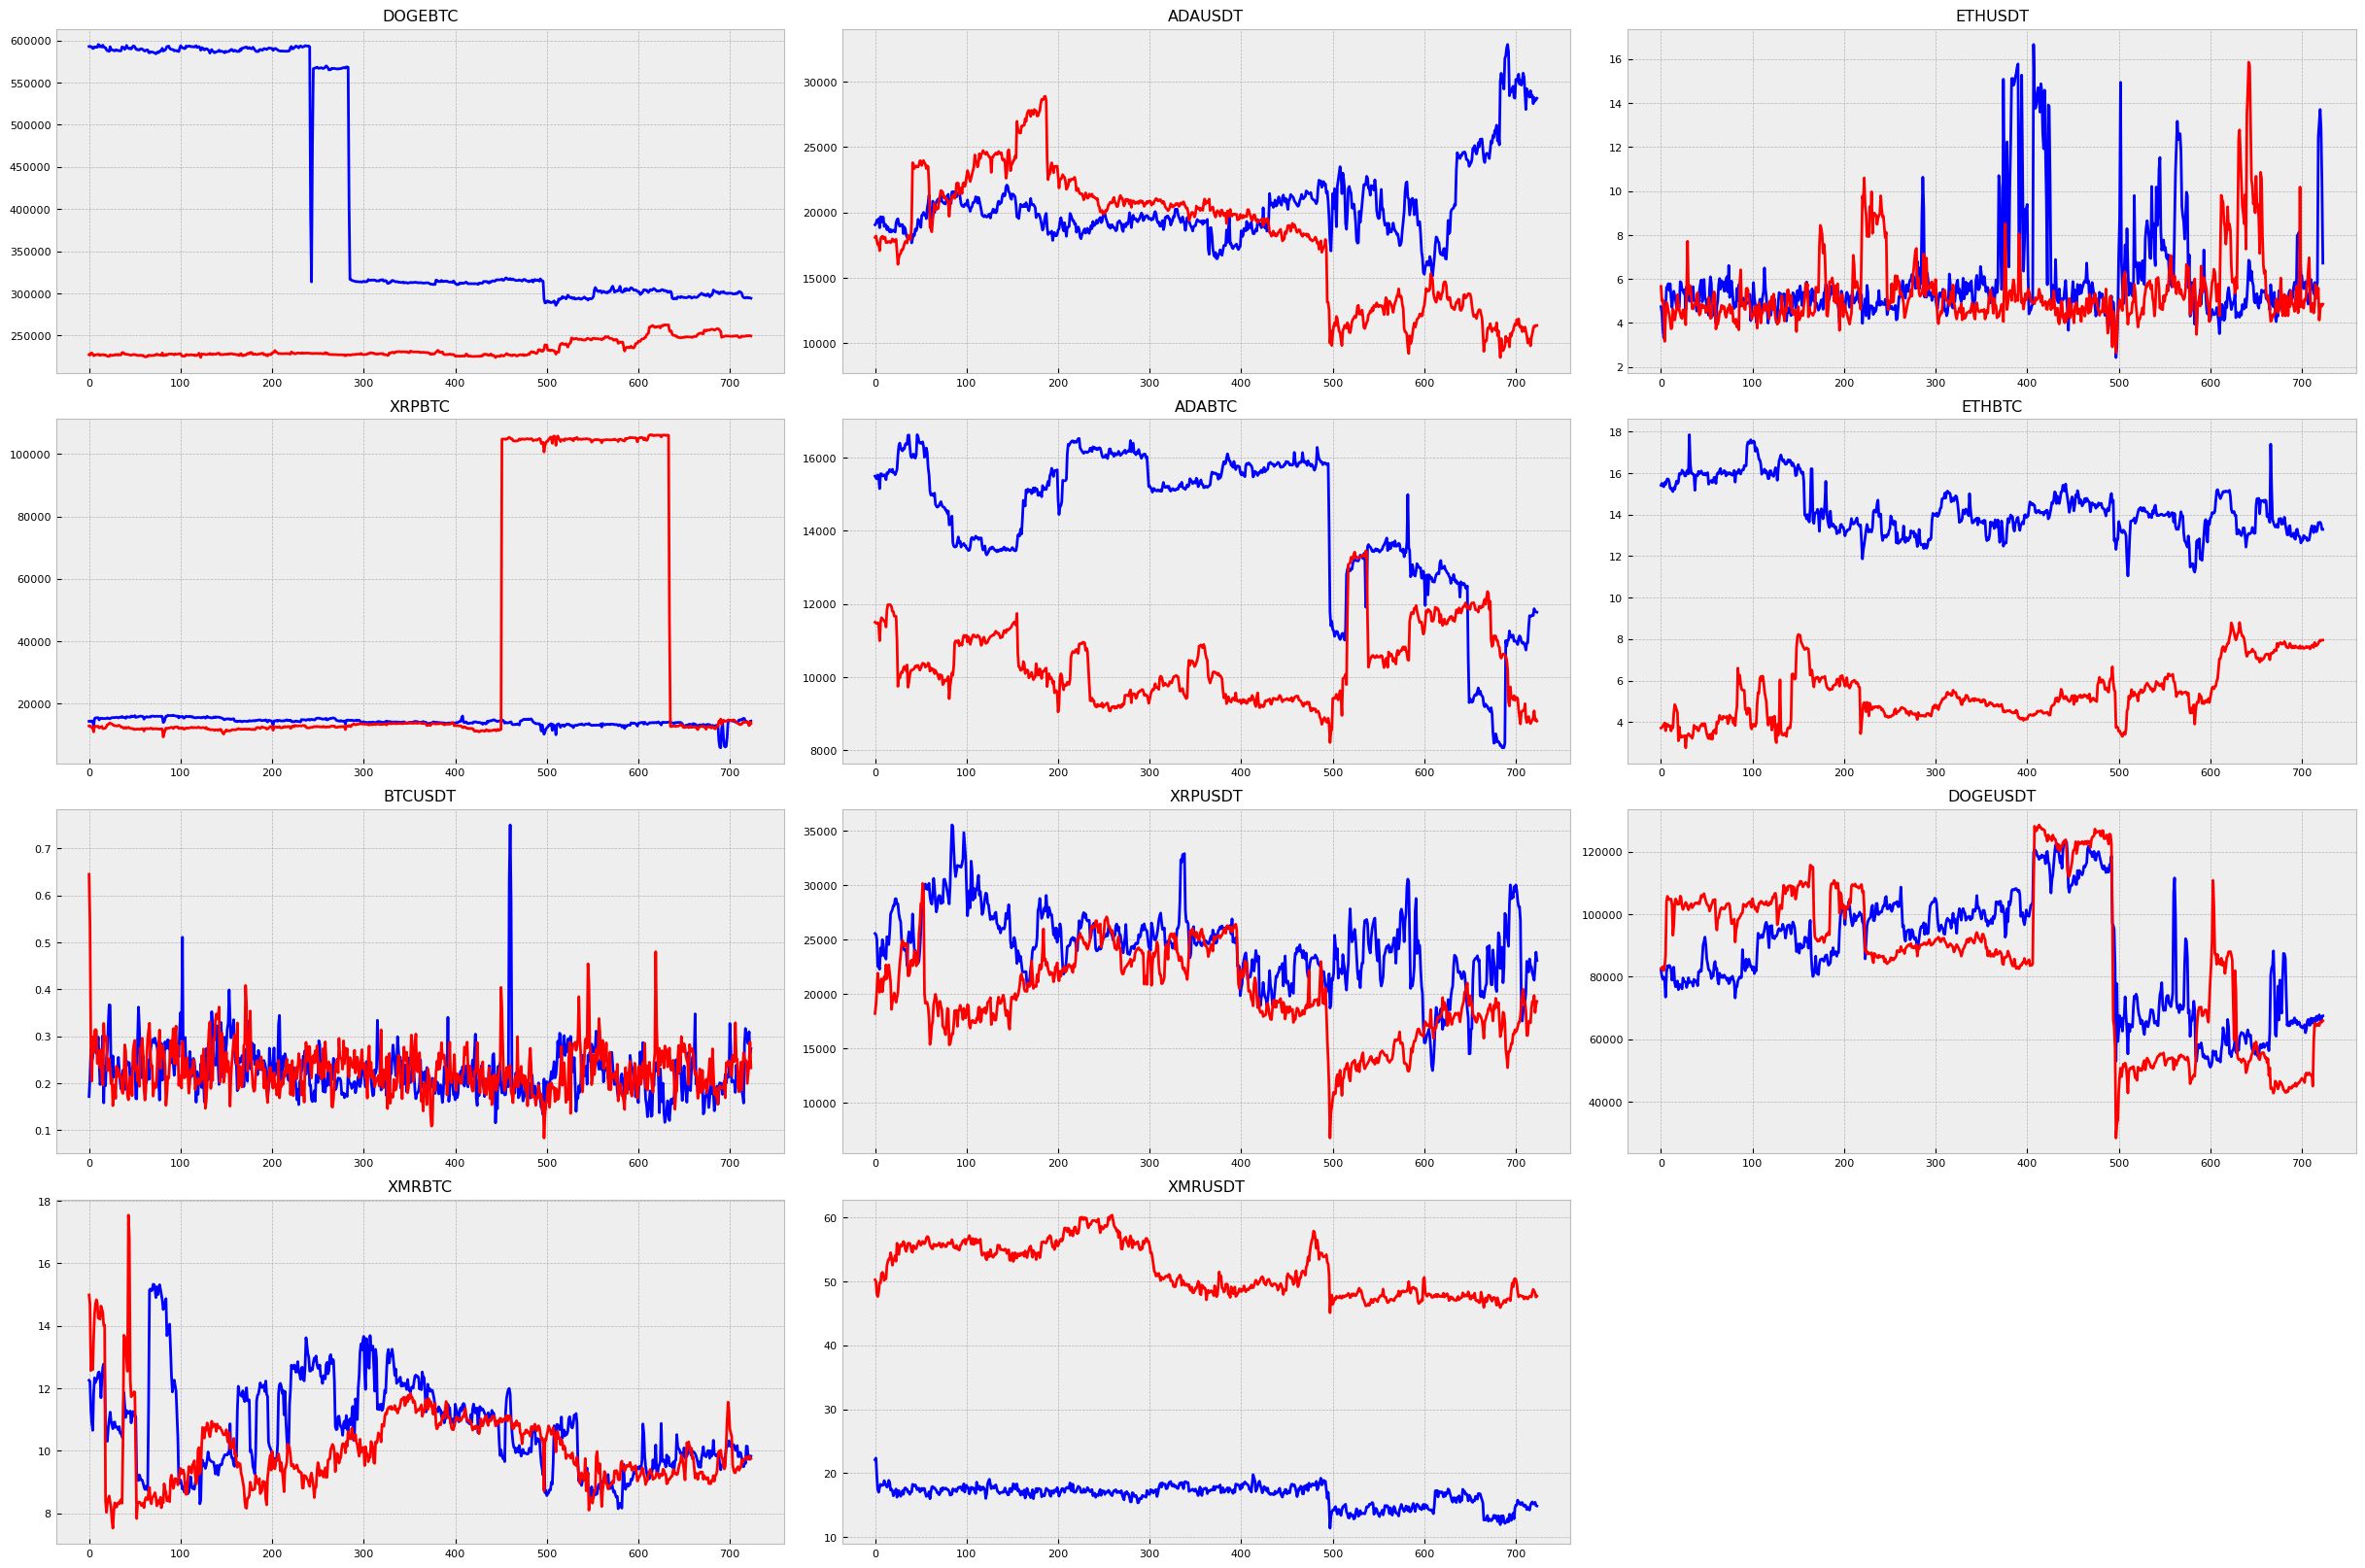

In [3]:
with plt.style.context('bmh'):
    plt.figure(figsize=(32, 20))
    x,y = 1,1
    for i, key in enumerate(trade_volume_map.keys()):
        ts_ax = plt.subplot2grid((5,4), (x, y))
        trade_volume_map[key]['bidaveragequantity'].plot(ax=ts_ax, color='blue')
        trade_volume_map[key]['askaveragequantity'].plot(ax=ts_ax, color='red')
        ts_ax.set_title(key)
        
        if x==4:
            x=1
            y=y+1
        else:
            x=x+1
    plt.tight_layout()
    

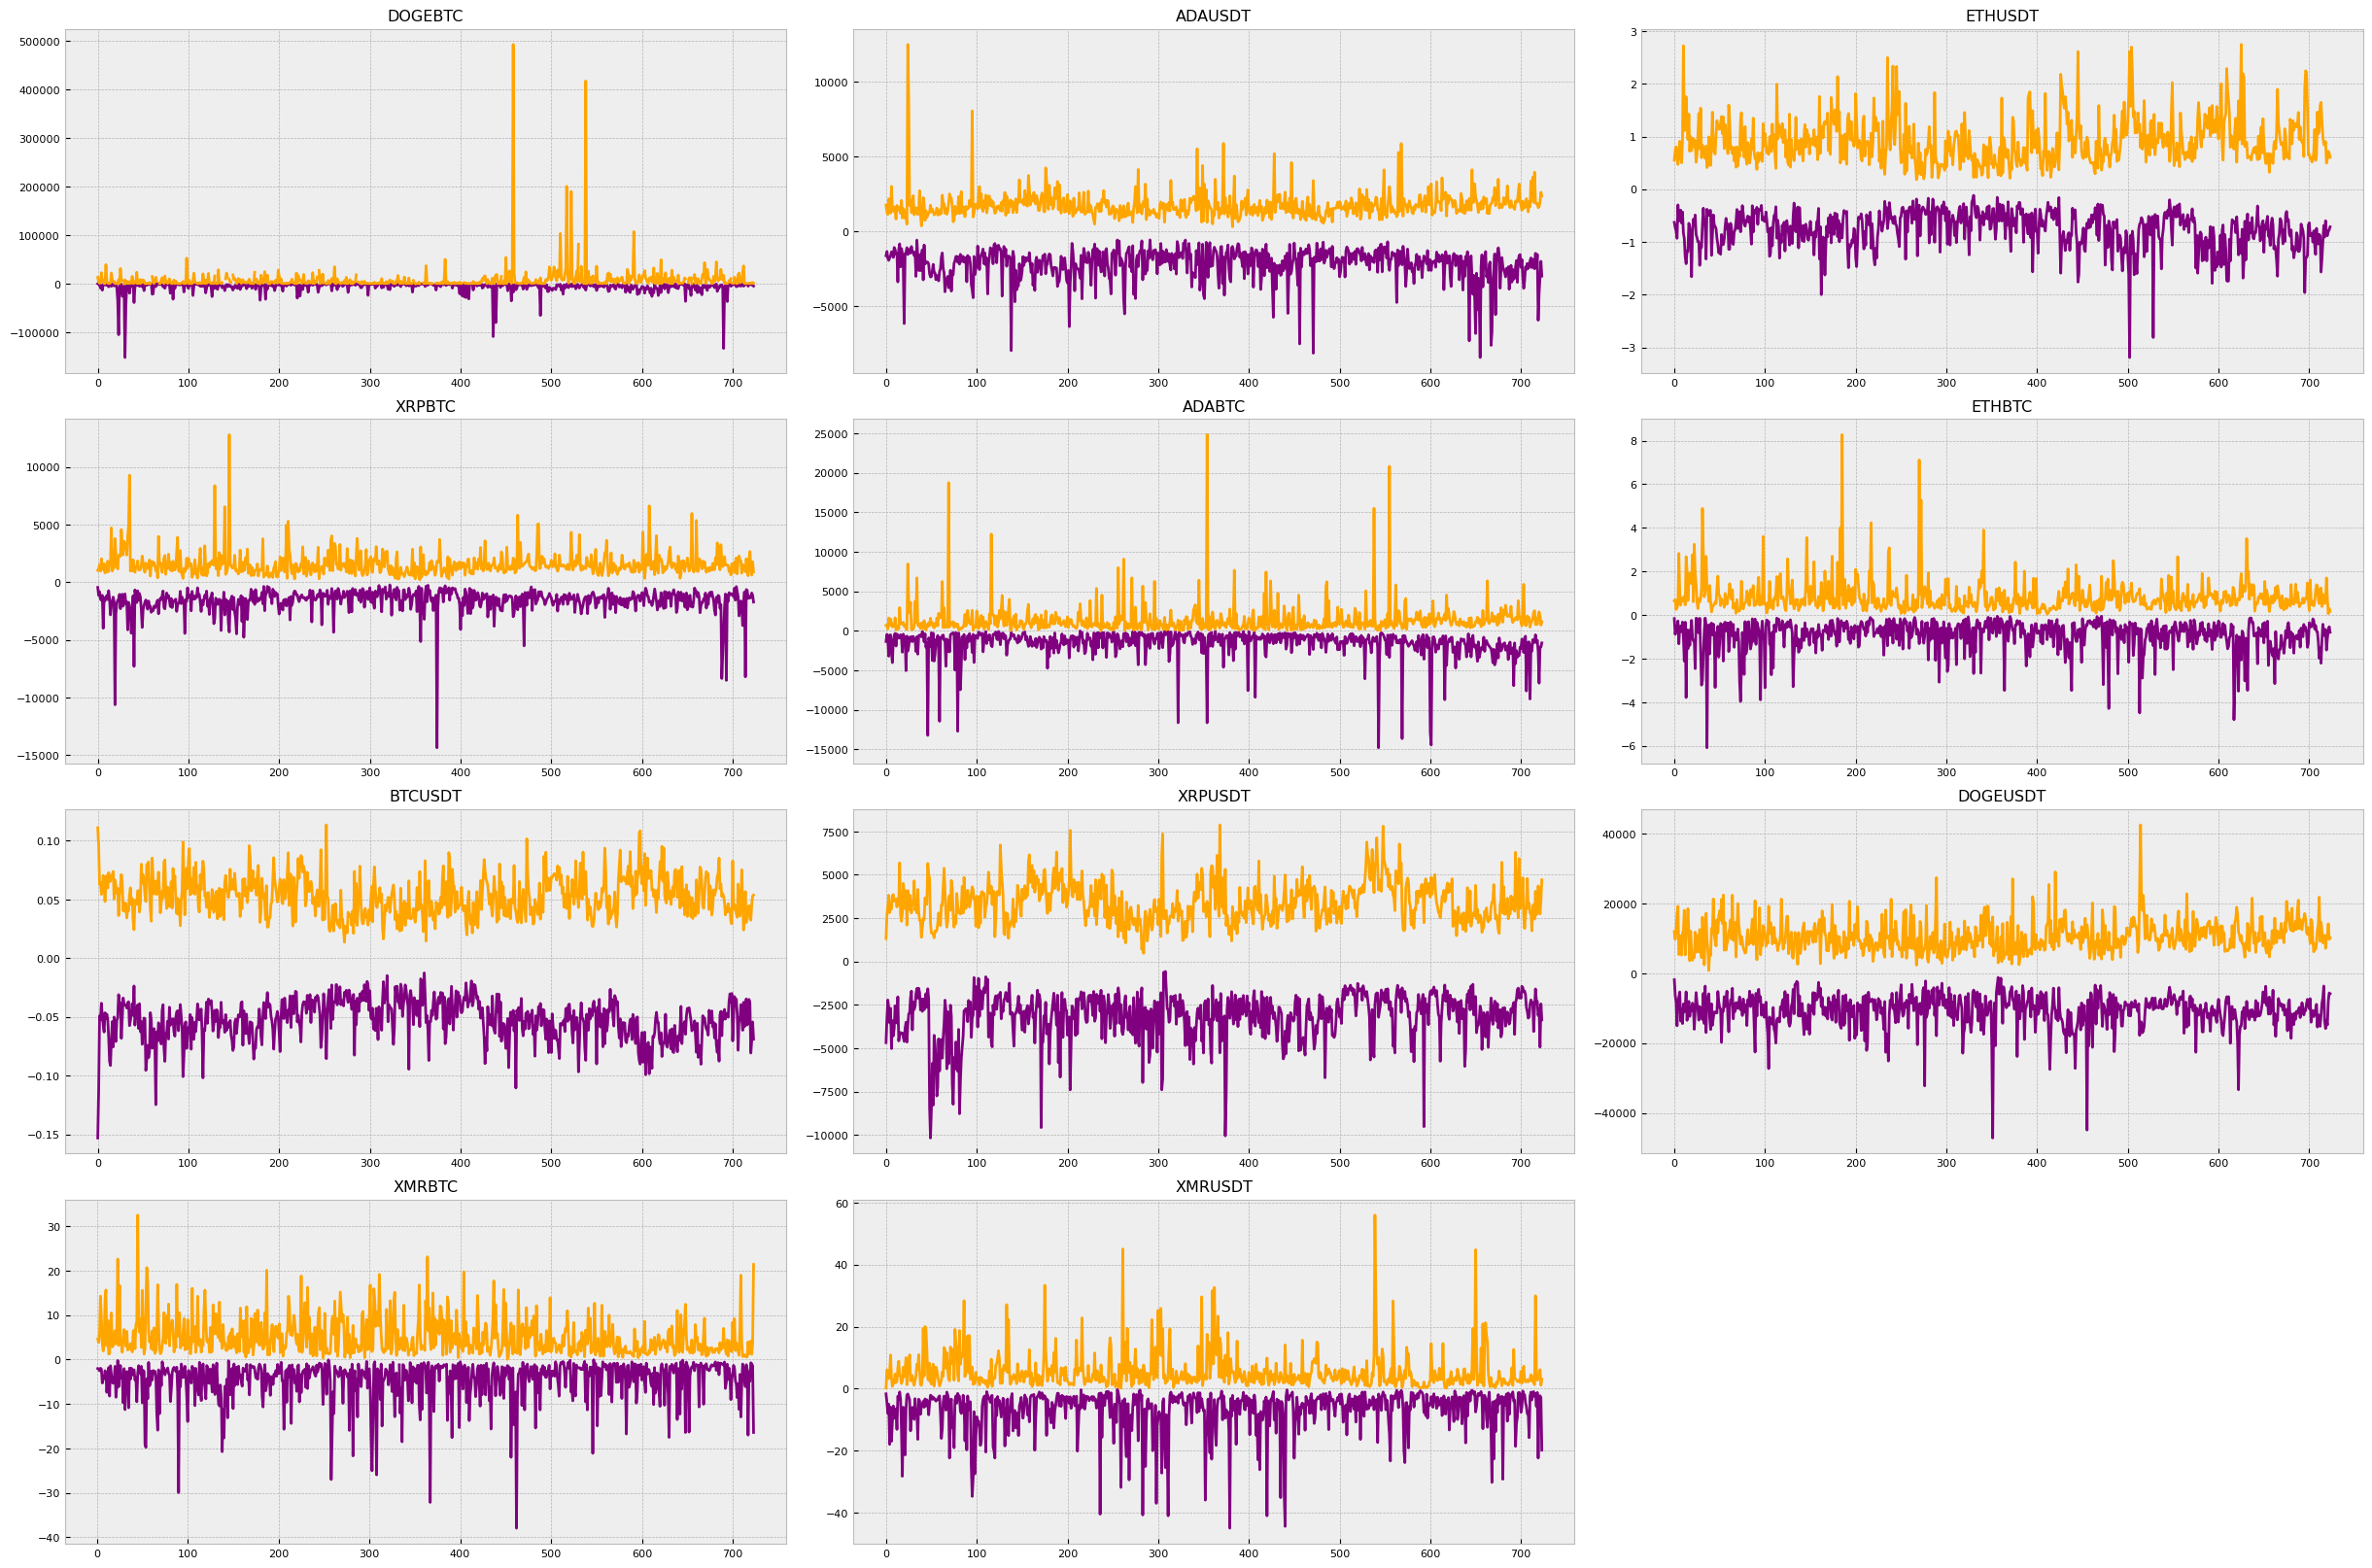

In [4]:
with plt.style.context('bmh'):
    plt.figure(figsize=(32, 20))
    x,y = 1,1
    for i, key in enumerate(trade_volume_map.keys()):
        ts_ax = plt.subplot2grid((5,4), (x, y))
        trade_volume_map[key]['sellaveragequantity'].map(lambda x:-x).plot(ax=ts_ax, color='purple')
        trade_volume_map[key]['buyaveragequantity'].plot(ax=ts_ax, color='orange')
        ts_ax.set_title(key)
        if x==4:
            x=1
            y=y+1
        else:
            x=x+1
    plt.tight_layout()
    
    

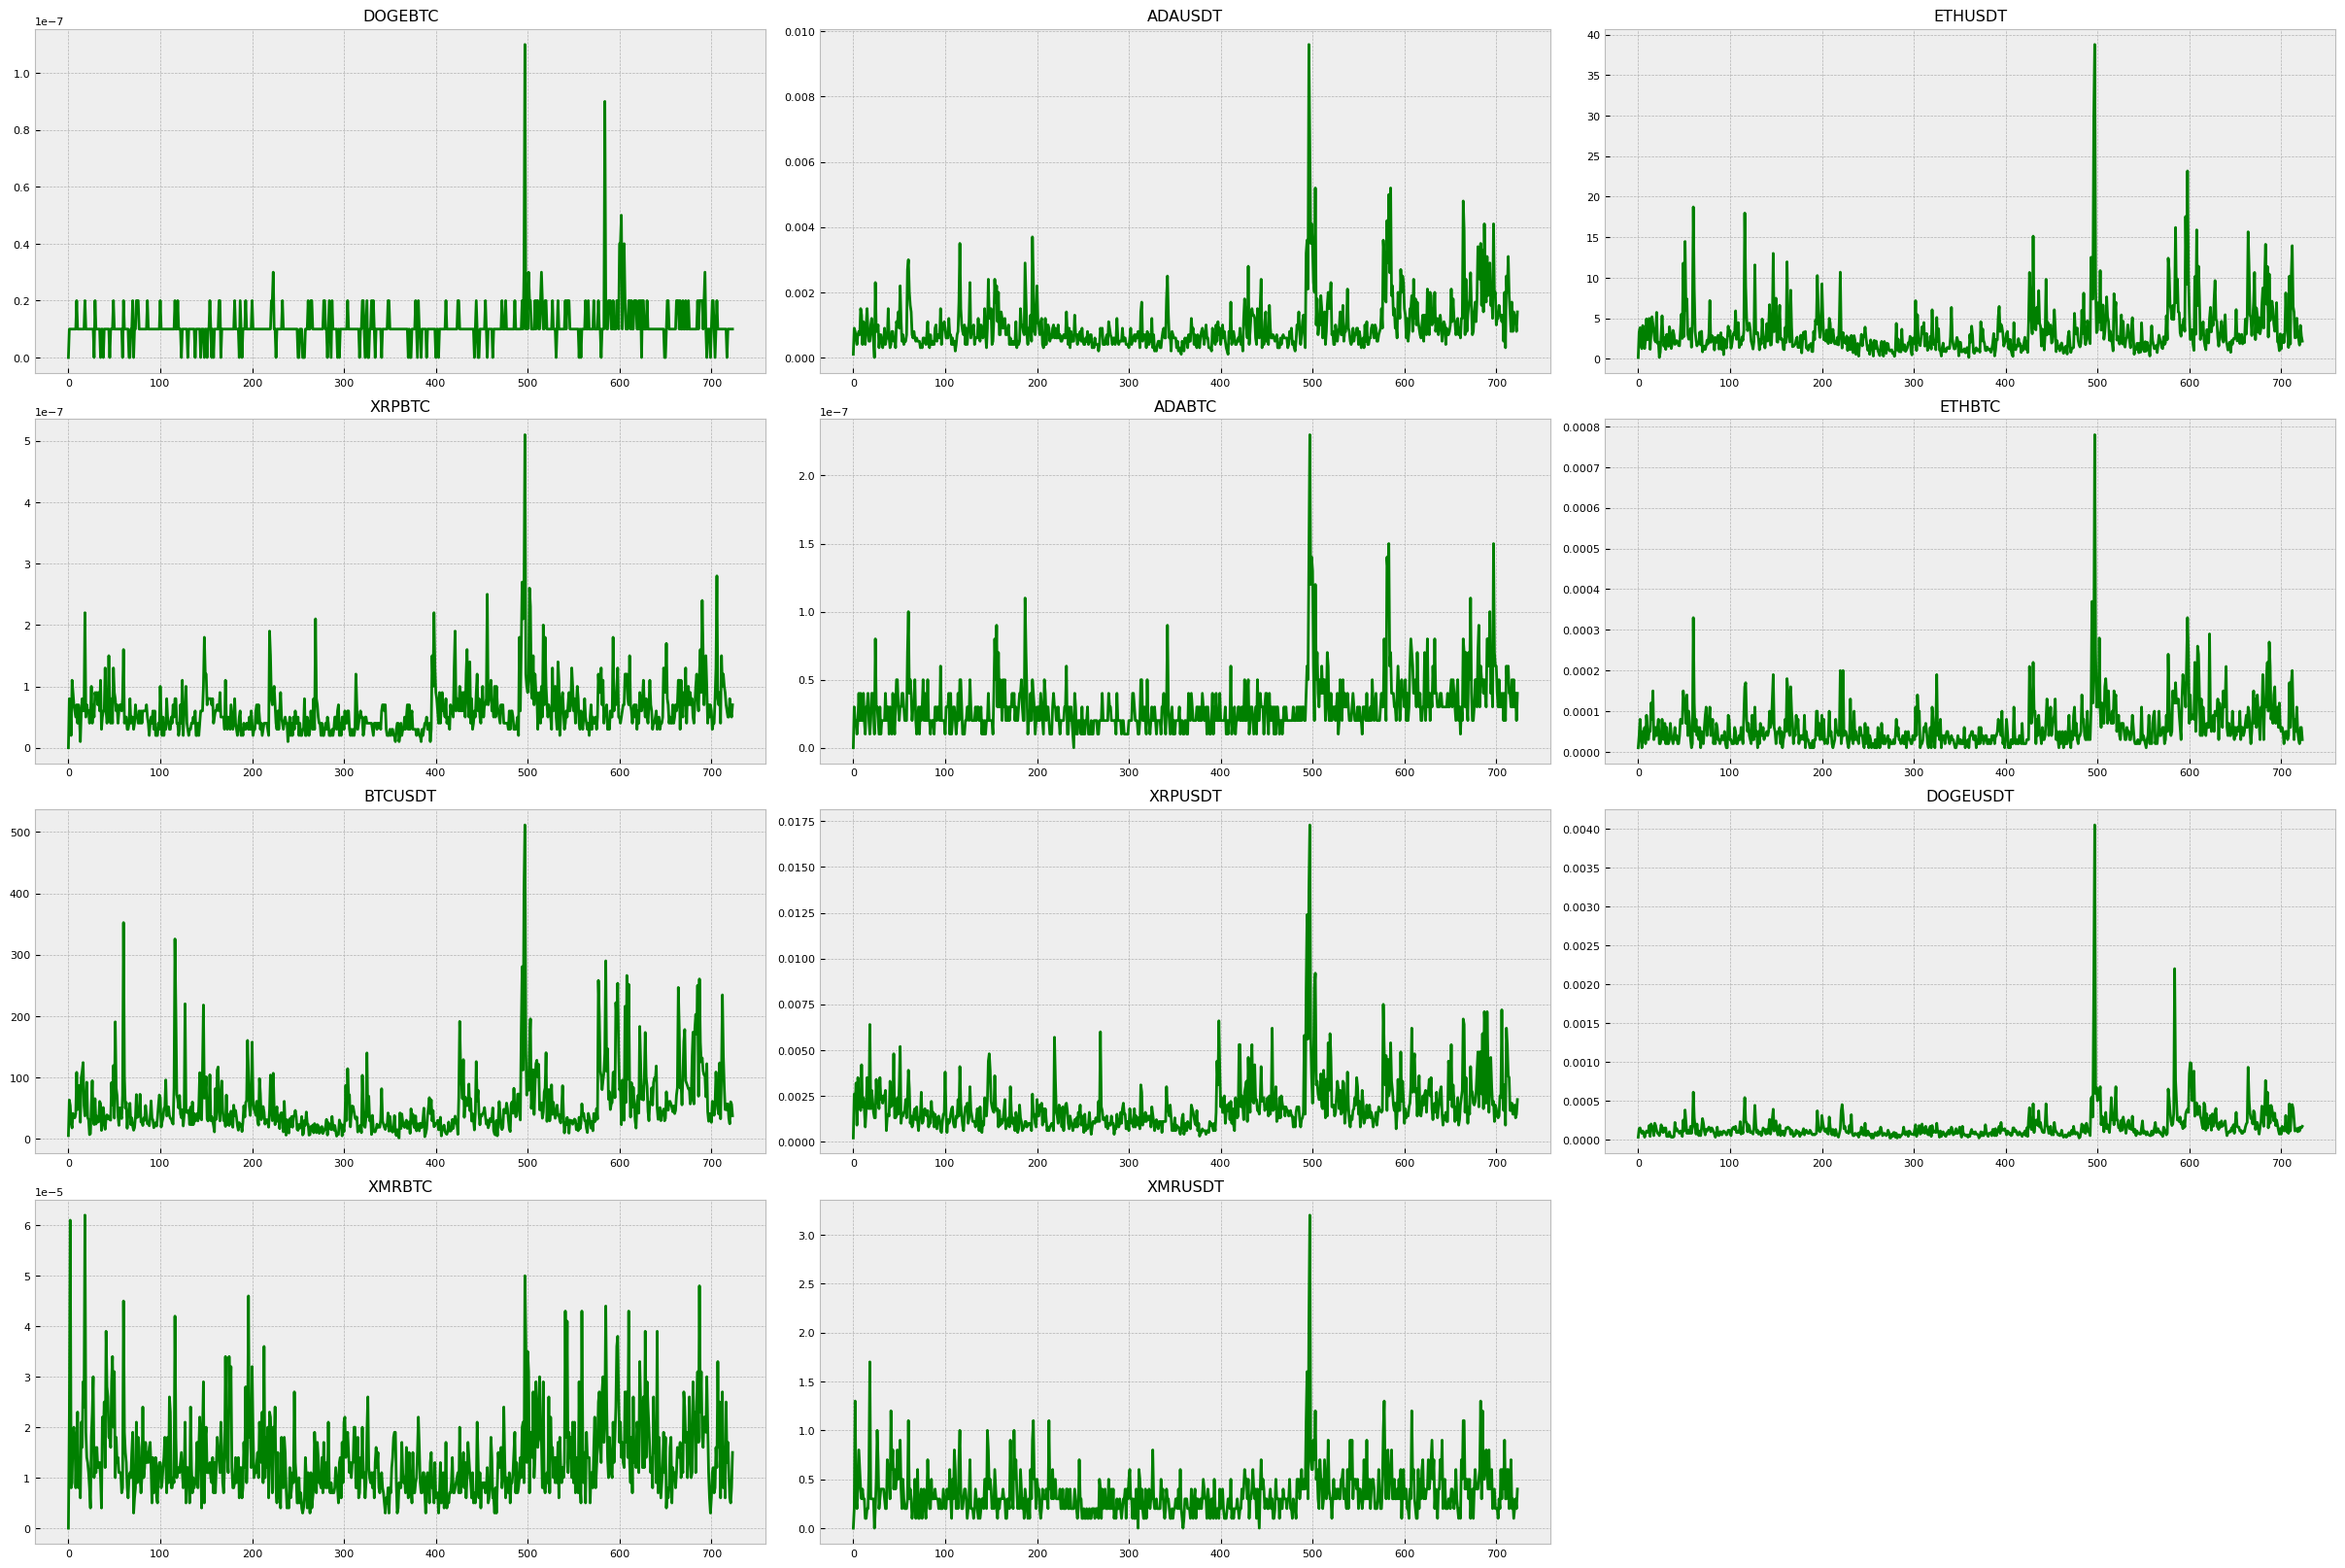

In [5]:


with plt.style.context('bmh'):
    plt.figure(figsize=(32, 20))
    x,y = 1,1
    for i, key in enumerate(trade_volume_map.keys()):
        ts_ax = plt.subplot2grid((5,4), (x, y))
        trade_volume_map[key]['volatilitycost'].plot(ax=ts_ax, color='green')
        ts_ax.set_title(key)
        if x==4:
            x=1
            y=y+1
        else:
            x=x+1
    plt.tight_layout()
    
    